In [1]:
import pandas as pd
import numpy as np                                       #Importing all Major Libraries in Python
import matplotlib.pyplot as plt
%matplotlib inline

##Data Preprocessing Stage

In [2]:
df= pd.read_excel('Ec401.xlsx', sheet_name= 'Sheet1', engine='openpyxl', header=0)    #Importing Excel file as DataFrame
df

,Name,Matches,Innings,NotOut,RunsScored,HS,Average,BallsFaced,StrikeRate,Centuries,HalfCenturies,Fours,Sixs,Capped,Indian,Auctionprice
0,Aaron Finch,3,3,1,23,10,11.50,33,69.69,0,0,4,0,1,0,3.20
1,AB de Villiers,16,14,3,513,133,46.63,293,175.08,1,2,60,22,1,0,9.50
2,Abu Nechim,3,3,2,10,5,10.00,5,200.00,0,0,2,0,0,1,0.30
3,Aditya Tare,2,2,0,14,7,7.00,17,82.35,0,0,1,0,0,1,1.60
4,Ajinkya Rahane,14,13,2,540,91,49.09,413,130.75,0,4,53,13,1,1,7.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Virender Sehwag,8,8,0,99,47,12.37,84,117.85,0,0,12,3,1,1,3.20
125,Wriddhiman Saha,14,13,0,249,42,19.15,197,126.39,0,0,16,10,0,1,2.20
126,Yusuf Pathan,13,12,5,312,52,44.57,231,135.06,0,1,29,12,1,1,3.25
127,Yuvraj Singh,14,13,0,248,57,19.07,210,118.09,0,2,23,10,1,1,16.00


In [3]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df.iloc[:,6:9])                                            #Replacing NaN with mean using Simple Imputer Module 
df.iloc[:,6:9] = imputer.transform(df.iloc[:,6:9])                      #Average is not defined for Batsmen who don't get out atleast once                    

In [4]:
df2=df.copy(deep=True)                                       #Creating a copy of original DataFrame
df.drop('Name', inplace=True,axis=1)
df

,Matches,Innings,NotOut,RunsScored,HS,Average,BallsFaced,StrikeRate,Centuries,HalfCenturies,Fours,Sixs,Capped,Indian,Auctionprice
0,3,3,1,23,10,11.500000,33.0,69.69,0,0,4,0,1,0,3.20
1,16,14,3,513,133,46.630000,293.0,175.08,1,2,60,22,1,0,9.50
2,3,3,2,10,5,10.000000,5.0,200.00,0,0,2,0,0,1,0.30
3,2,2,0,14,7,7.000000,17.0,82.35,0,0,1,0,0,1,1.60
4,14,13,2,540,91,49.090000,413.0,130.75,0,4,53,13,1,1,7.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,8,8,0,99,47,12.370000,84.0,117.85,0,0,12,3,1,1,3.20
125,14,13,0,249,42,19.150000,197.0,126.39,0,0,16,10,0,1,2.20
126,13,12,5,312,52,44.570000,231.0,135.06,0,1,29,12,1,1,3.25
127,14,13,0,248,57,19.070000,210.0,118.09,0,2,23,10,1,1,16.00


##Feature Selection Stage
(Selects best features to Improve Accuracy and Reduce Overfitting)

###Regression with all the Variables

In [5]:
df1= df.copy(deep= True)
Xa= df1.iloc[:,:-1]
Ya= df1.iloc[:,-1]
import statsmodels.api as sm
Xa_new= sm.add_constant(Xa)
modela = sm.OLS(Ya, Xa_new)
resultsa = modela.fit()
print(resultsa.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:           Auctionprice   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     7.761
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           2.75e-11
Time:                        14:52:30   Log-Likelihood:                -303.67
No. Observations:                 129   AIC:                             637.3
Df Residuals:                     114   BIC:                             680.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4520      0.981      0.461

###Selecting the Most Relevant Features

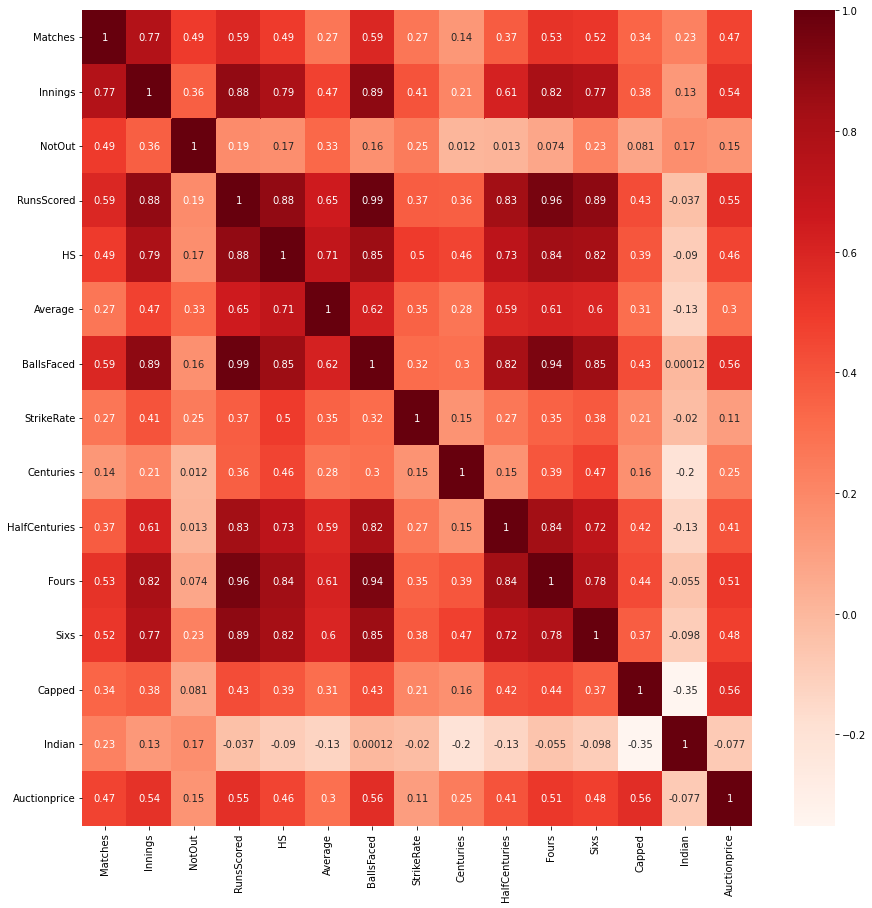

In [6]:
#Using Pearson Correlation
plt.figure(figsize=(15,15))
cor = df.corr()
import seaborn as sns
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [7]:
#Correlation with output variable
cor_target = abs(cor["Auctionprice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features


Innings         0.538854
RunsScored      0.546719
BallsFaced      0.560885
Fours           0.509125
Capped          0.557288
Auctionprice    1.000000
Name: Auctionprice, dtype: float64

In [8]:
df.drop('Matches', axis=1, inplace=True)
df.drop('NotOut', axis=1, inplace=True)
df.drop('HS', axis=1, inplace=True)
df.drop('Centuries', axis=1, inplace=True)
df.drop('HalfCenturies', axis=1, inplace=True)
df.drop('Sixs', axis=1, inplace=True)
df.drop('Indian', axis=1, inplace=True)
df.drop('StrikeRate', axis=1, inplace=True)
df.drop('Average', axis=1, inplace=True)


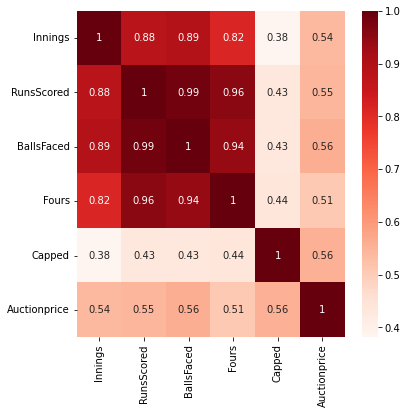

In [9]:
#Correlation within these 5 Independent Variables
#Using Pearson Correlation
plt.figure(figsize=(6,6))
cor = df.corr()
import seaborn as sns
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
X= df.iloc[:,:-1]
Y= df.iloc[:,-1]

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [12]:
df.drop('BallsFaced',axis=1,inplace=True)                     #High Correlation with Runs

In [13]:
X1= df.iloc[:,:-1]
Y1= df.iloc[:,-1]

In [14]:
X1_new=sm.add_constant(X1)
model2 = sm.OLS(Y1, X1_new)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:           Auctionprice   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     24.60
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           5.31e-15
Time:                        14:52:32   Log-Likelihood:                -309.17
No. Observations:                 129   AIC:                             628.3
Df Residuals:                     124   BIC:                             642.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0406      0.501     -0.081      0.9

In [15]:
Xi= X1.drop('RunsScored', axis=1)
Xi_new=sm.add_constant(Xi)
modeli = sm.OLS(Y1, Xi_new)
results2i = modeli.fit()
print(results2i.summary())

                            OLS Regression Results                            
Dep. Variable:           Auctionprice   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     32.23
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           1.68e-15
Time:                        14:52:32   Log-Likelihood:                -309.89
No. Observations:                 129   AIC:                             627.8
Df Residuals:                     125   BIC:                             639.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2075      0.481     -0.431      0.6

##Numerology (Q1 b part)

In [16]:
name= df2['Name'].str.split(' ')

In [17]:
name[0][0], name[1][0], name[0][1]

('Aaron', 'AB', 'Finch')

In [18]:
first=[]
for i in range (0,129,1):
  first.append(name[i][0])

In [19]:
first[1]='Abraham'

In [20]:
from string import ascii_lowercase
def convertName(playerName):
    LETTERS = {letter: str(index) for index, letter in enumerate(ascii_lowercase, start=1)}  
    
    def getSum(n):                                 #does sum of digits
        sum = 0
        for digit in str(n): 
            sum += int(digit)
        return sum                                  #returns sum of digits
    
    def sumOfList(a):
        b=0
        for i in a:
            b=b+i                                    # Converts to a single digit Ex: 16= 1+6= 7
        return b


    def alphabet_position(text):                     #Convert name to lower case
        text = text.lower()
        numbers = [int(LETTERS[character]) for character in text if character in LETTERS]
        return getSum(sumOfList(numbers))
    
    finalResult =alphabet_position(playerName)
    
    if(int(finalResult)>0):
        finalResult=getSum(finalResult)
    return finalResult

In [21]:
convertName("Kirtivardhan")

9

In [22]:
first[128]

'Yuzvendra'

In [23]:
num=[]
for j in range (129):
  num.append(convertName(first[j]))

In [24]:
convertName('Abu')

6

In [25]:
print(convertName(first[2]))

6


In [26]:
num

[4,
 8,
 6,
 6,
 8,
 2,
 1,
 7,
 6,
 9,
 1,
 3,
 1,
 1,
 8,
 9,
 7,
 6,
 6,
 7,
 9,
 9,
 3,
 3,
 3,
 4,
 6,
 4,
 4,
 4,
 6,
 4,
 5,
 4,
 9,
 9,
 7,
 4,
 9,
 3,
 7,
 7,
 4,
 9,
 6,
 4,
 1,
 5,
 7,
 3,
 3,
 8,
 1,
 4,
 5,
 8,
 2,
 3,
 9,
 5,
 6,
 2,
 7,
 4,
 1,
 8,
 1,
 2,
 6,
 1,
 1,
 1,
 2,
 8,
 2,
 5,
 2,
 7,
 4,
 8,
 4,
 3,
 1,
 1,
 8,
 9,
 8,
 2,
 5,
 5,
 5,
 6,
 4,
 9,
 4,
 7,
 4,
 4,
 1,
 2,
 9,
 7,
 3,
 2,
 5,
 2,
 2,
 9,
 2,
 5,
 5,
 9,
 8,
 9,
 3,
 9,
 4,
 4,
 6,
 3,
 1,
 4,
 8,
 7,
 5,
 4,
 2,
 7,
 1]

###Simple Linear Regression 

In [27]:
num_new= sm.add_constant(num)
model1 = sm.OLS(Y,num_new )
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:           Auctionprice   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     3.244
Date:                Tue, 30 Nov 2021   Prob (F-statistic):             0.0741
Time:                        14:52:32   Log-Likelihood:                -345.22
No. Observations:                 129   AIC:                             694.4
Df Residuals:                     127   BIC:                             700.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2170      0.663      3.345      0.0

###Multiple Regression

In [28]:
X2= X1.copy(deep=True)
X2['num']=num

In [29]:
X2_new= sm.add_constant(X2)
model2 = sm.OLS(Y1, X2_new)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:           Auctionprice   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     19.88
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           1.75e-14
Time:                        14:52:32   Log-Likelihood:                -308.65
No. Observations:                 129   AIC:                             629.3
Df Residuals:                     123   BIC:                             646.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4326      0.636     -0.680      0.4

In [30]:
X3=X2.drop('RunsScored',axis=1)           #Dropping RunsScored due to its high correlation with Innings and Fours

In [31]:
X3_new= sm.add_constant(X3)
model3 = sm.OLS(Y1, X3_new)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:           Auctionprice   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     24.45
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           6.23e-15
Time:                        14:52:32   Log-Likelihood:                -309.34
No. Observations:                 129   AIC:                             628.7
Df Residuals:                     124   BIC:                             643.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6080      0.618     -0.983      0.3